In [91]:
import cv2


In [92]:
import matplotlib.pyplot as plt

In [93]:
config_file= 'C:/Users/swarn/OneDrive/Desktop/object detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'c:/Users/swarn/OneDrive/Desktop/object detection/frozen_inference_graph.pb'

In [94]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [95]:
classLabels = []
file_name = 'C:/Users/swarn/OneDrive/Desktop/object detection/Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [96]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [97]:
print(len(classLabels))

80


In [98]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002949DF63FB0>

In [99]:
img=cv2.imread('C:/Users/swarn/OneDrive/Desktop/object detection/traffic.jpg')

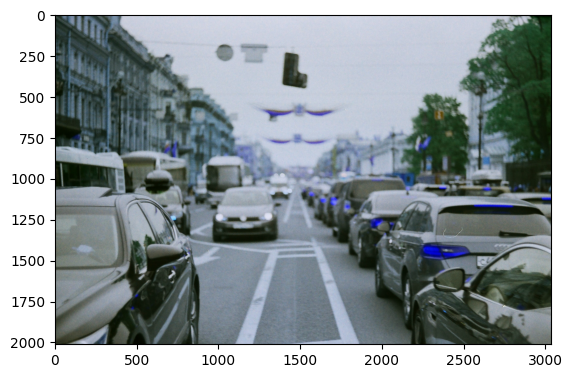

In [100]:
plt.imshow(img)

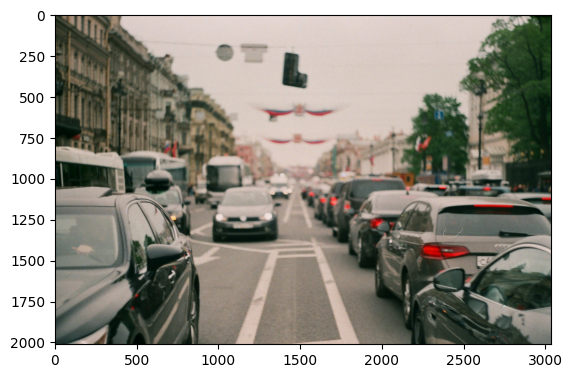

In [101]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [102]:

# Example: Assuming expected_size is the size expected by the model
#expected_size = (10, 10)
#img_resized = cv2.resize(img, expected_size)
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)



In [103]:
print(ClassIndex)

[ 3  3  3  3  3  3  3  3 10  3  3  3  3  3  3]


In [104]:
'''font_scale = 3
font =cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassIndex-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    '''
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[int(classInd) - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


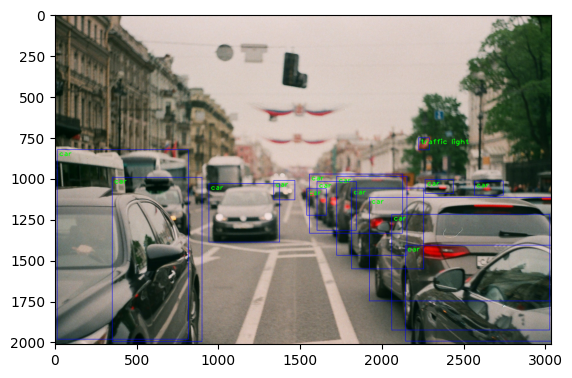

In [105]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [106]:
cap = cv2.VideoCapture('C:/Users/swarn/OneDrive/Desktop/object detection/videotr.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    # Check if the frame is successfully read
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)

    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[int(ClassInd) - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[3 3 3 3 3 8 1 3 3 3 8 3 1 3 3 3]
[3 3 3 1 3 1 8 1 3 3 1 4 1 3 8 3 8]
[3 3 3 8 3 1 1 3 3 3 3 3 8 3 4 1 1 1 1]
[3 3 3 1 8 3 3 8 3 3 1 8 3 4 1 3 3 1 1 3]
[3 3 3 1 3 1 8 3 3 8 3 8 4 1 6 6]
[3 3 3 1 4 1 3 3 3 8 8 1 3 3 8 4 3 3 6]
[3 3 3 8 3 3 3 3 3 8 8 3 1 3 4 3]
[3 3 3 8 3 3 3 3 3 8 3 3 8 1 3 4]
[3 3 3 8 3 3 3 1 1 1 8 4 1 6 3 1 6]
[3 3 3 3 3 8 3 1 3 1 3 6 8 7 6 1]
[3 3 8 3 3 3 1 3 3 3 3 8 6]
[3 1 3 8 3 3 3 1 1 3 3 6 8 3]
[1 1 3 3 8 3 3 1 3 3 6 1 8]
[1 1 3 3 3 3 3 1 3 8 6 3 4 3]
[1 3 3 1 3 3 3 8 1 4 3 3 6]
[3 3 1 3 3 1 1 8 3 3 3 3 4]
[1 3 3 3 3 1 8 3 3 1 3 3 3 4 6]
[1 3 3 3 3 3 3 1 3 1 4 8 3 3]
[1 3 3 3 3 3 1 3 3 1 6 3 8 3 3 4]
[3 1 3 3 3 3 1 3 3 3 3 8 3 1]
[1 1 3 3 3 3 3 4 3 3 3 2 1 8]
[1 3 3 3 1 4 3 3 8 1 2 3 3 3]
[1 3 3 3 1 3 3 3 3 8 3 4]
[1 3 3 3 1 3 3 8 3 3 3 4 1 8]
[1 3 3 3 1 3 4 3 1 3 8 3 1 3 3]
[1 3 3 3 3 3 4 3 1 8 3 1 3 3]
[3 1 3 3 3 1 1 4 3 8 3 1 3 2 3]
[3 1 1 3 4 3 3 1 3 3 1 2 8 3]
[3 1 3 3 3 3 1 1 4 1 2 3 7 3]
[3 1 1 4 3 1 3 3 3 3 8 1 7]
[3 4 1 3 1 3 3 1 3 1 3]
[1 3 1 3 1 3 4 3